In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
%matplotlib inline

In [22]:
import pymc3 as pm3
from sklearn import svm
import numpy as np
import numdifftools as ndt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize

In [31]:
x1_mean = np.array([3,3])
x1_cov  = np.array([[1,0],[0,1]])
x1      = np.random.multivariate_normal(x1_mean, x1_cov, 100)
x2_mean = np.array([3,6])
x2_cov  = np.array([[2,0],[0,2]])
x2      = np.random.multivariate_normal(x1_mean, x1_cov, 100)


In [32]:
xa = [a[0] for a in x1]

In [33]:
xb = [a[1] for a in x1]

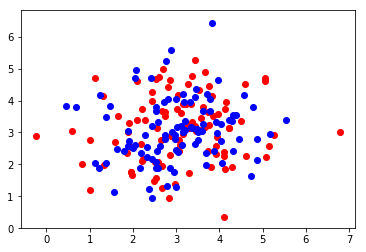

In [34]:
xc = [a[0] for a in x2]
xd = [a[1] for a in x2]
plt.scatter(xa,xb,color='red')
plt.scatter(xc,xd,color='blue')
plt.show()

In [35]:
y1 = [1 for i in range(len(x1))]
y2 = [-1 for i in range(len(x2))]

In [36]:
y = y1 + y2
y = np.asarray(y)
x = np.append(x1,x2,axis = 0)
print(x.shape)
print(y.shape)

(200, 2)
(200,)


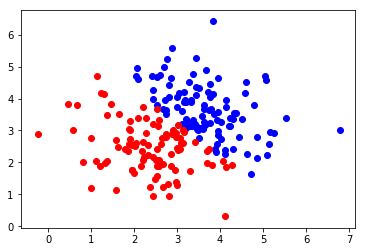

In [39]:
model  = svm.SVC(kernel = 'linear', C = 0.1)
model  = model.fit(x,y)
y_pred = model.predict(x)
x1d    = x[np.where(y_pred == 1)]
x2d    = x[np.where(y_pred == -1)]
plt.scatter(x1d[:,0], x1d[:,1] , color = 'b')
plt.scatter(x2d[:,0], x2d[:,1] , color = 'r')
plt.show()

In [38]:
y_out = model.predict(x)
def plot_contours(ax,clf, xx, yy, **params):
    z   = clf.predict(np.c_xx.ravel(), yy.ravel())
    z   = z.reshape(xx.shape)
    out = ax.contour(xx, yy, z, **params)
    return out
                
def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy       = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    return xx,yy